In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import pandas as pd
import seaborn as sns



In [7]:
df = pd.read_csv('data/archive/healthcare-dataset-stroke-data.csv')
df.drop('id', inplace=True, axis=1)
# df.dropna(inplace=True, subset=['bmi'])

# df = df[df["smoking_status"] != "Unknown"]
# x = df[df["stroke"] == 1]
# df.info()

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

encoder_df = pd.DataFrame(one_hot.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray())

final_df = df.join(encoder_df)
final_df.dropna(inplace=True, subset=['bmi'])
final_df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)

X = final_df.drop('stroke', axis=1)
y = final_df["stroke"]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

final_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,67.000000,0,1,228.690000,36.600000,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,80.000000,0,1,105.920000,32.500000,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,49.000000,0,0,171.230000,34.400000,1.000000,0.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
3,79.000000,1,0,174.120000,24.000000,1.000000,0.000000,0.0,0.0,1.0,...,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,81.000000,0,0,186.210000,29.000000,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,69.068967,0,0,195.185517,28.096549,0.034483,0.965517,0.0,0.0,1.0,...,0.0,0.000000,0.965517,0.0,0.034483,0.965517,0.000000,0.000000,0.000000,1.000000
9396,80.000000,0,0,243.102002,27.834680,0.000000,1.000000,0.0,0.0,1.0,...,0.0,0.761520,0.238480,0.0,0.000000,1.000000,0.000000,0.238480,0.761520,0.000000
9397,73.649536,0,0,198.306443,26.982632,0.774923,0.225077,0.0,0.0,1.0,...,0.0,0.774923,0.225077,0.0,0.774923,0.225077,0.774923,0.000000,0.000000,0.225077
9398,77.578492,0,0,130.270394,23.777821,0.203073,0.796927,0.0,0.0,1.0,...,0.0,0.796927,0.000000,0.0,0.796927,0.203073,0.000000,0.796927,0.203073,0.000000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 3436
Tamanho do conjunto de teste: 1473


In [4]:
pipeline = Pipeline(steps=[
  ("normalizacao", MinMaxScaler()),  
  ("MLP", MLPClassifier(alpha=1, max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)
print(f"Acurácia de treinamento: {pipeline.score(X_train, y_train)}")

Acurácia de treinamento: 0.9583818393480792


<AxesSubplot:>

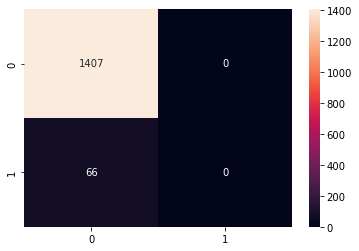

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")